# Interval Statistic
Interval statistic is library to calculate interval estimations of an average and a variance.

There are several algorithms to test the distribution:

- chi-square goodness-fit test
    
    - with simple interval count
    - with Eadie k formula
    - with Dahiya k formula
    - with k for large n

Load Libraries

In [18]:
using IntervalStatistic
using Distributions
using ValidatedNumerics
using Plots
pyplot(reuse=true)
srand(10)

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[1007524736,1073256705,415953332,1072893275,-601364280,1073193666,-1335760268,1072926448,1521827180,1073499520  …  -439825479,1072978026,-411693740,1073111955,-1611334130,1963385220,236575170,-789052601,382,0]),[1.17691,1.65309,1.49663,1.37118,1.29607,1.01556,1.65246,1.36709,1.33526,1.12341  …  1.57083,1.20129,1.83568,1.48562,1.44252,1.9173,1.58492,1.65858,1.65798,1.65559],382,UInt32[0x0000000a])

In [19]:
function show_result(value_check_label, position)
    values, check, label = value_check_label
    isDistr = IntervalStatistic.isDistribution(values, check)
    println(label, ": ", isDistr)
    hist = IntervalStatistic.Check.histogram(values, check)
    
    intervals = [i[1] for i in hist]
    midles, weights = Real[mid(i) for i in intervals], Real[i[2] for i in hist]
    all_count = sum(weights)
    plot!(x -> midles[round(Int, x)], x -> begin
        i = round(Int,x)
        weights[i]/diam(intervals[i])/all_count
        end,
        1:size(midles, 1), 
        label=label
    )
end

show_result (generic function with 1 method)

Generate samples of normal distribution

In [20]:
d = Normal()
length = 500
confidence_probability = 0.95
values = rand(d, length)
mu, sigma = params(d)
average = reduce(+, values) / length

0.020139963008043885

Chi-square with simple k formula: true
Chi-square with Dahiya k formula: false
Chi-square with k formula for large n: true



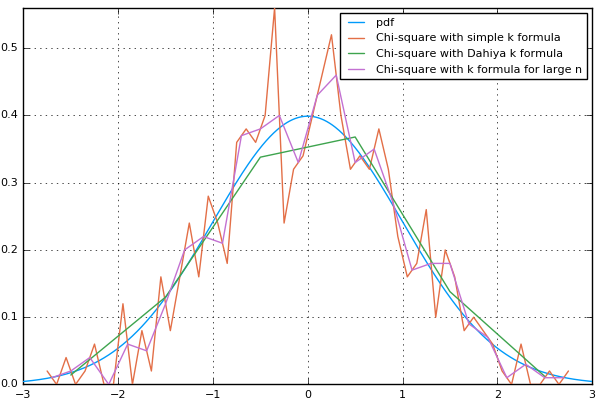

In [21]:
result_by_dahiya_chi_square = (
    values,
    IntervalStatistic.Check.DahiyaChiSquareCheck(0.05, Normal(mu, sigma)),
    "Chi-square with Dahiya k formula"
)

result_by_simple_chi_square = (
    values,
    IntervalStatistic.Check.SimpleChiSquareCheck(0.05, Normal(mu, sigma)),
    "Chi-square with simple k formula"
)

result_by_large_n_chi_square = (
    values,
    IntervalStatistic.Check.LargeNChiSquareCheck(0.05, Normal(mu, sigma)),
    "Chi-square with k formula for large n"
)
plot((mu - 3*sigma):(sigma*0.01):(mu + 3*sigma), (x) -> pdf(d, x), label="pdf")

show_result(result_by_simple_chi_square, 1)
show_result(result_by_dahiya_chi_square, 3)
show_result(result_by_large_n_chi_square, 4)

Generate samples of normal distribution with mu=100 sigma=4

In [22]:
d = Normal(100, 4)
length = 500
confidence_probability = 0.95
values = rand(d, length)
mu, sigma = params(d)
average = reduce(+, values) / length

99.96458979418557

Chi-square with simple k formula: true
Chi-square with Dahiya k formula: false
Chi-square with k formula for large n: false



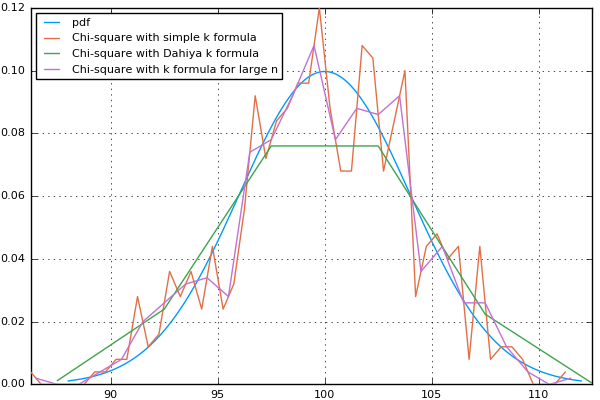

In [23]:
result_by_dahiya_chi_square = (
    values,
    IntervalStatistic.Check.DahiyaChiSquareCheck(0.05, Normal(mu, sigma)),
    "Chi-square with Dahiya k formula"
)

result_by_simple_chi_square = (
    values,
    IntervalStatistic.Check.SimpleChiSquareCheck(0.05, Normal(mu, sigma)),
    "Chi-square with simple k formula"
)

result_by_large_n_chi_square = (
    values,
    IntervalStatistic.Check.LargeNChiSquareCheck(0.05, Normal(mu, sigma)),
    "Chi-square with k formula for large n"
)
plot((mu - 3*sigma):(sigma*0.01):(mu + 3*sigma), (x) -> pdf(d, x), label="pdf")

show_result(result_by_simple_chi_square, 1)
show_result(result_by_dahiya_chi_square, 3)
show_result(result_by_large_n_chi_square, 4)